In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score

df_train_models = pd.read_excel("datasets/df_train_models.xlsx")

In [3]:
# Definir el modelo XGBoost
model = xgb.XGBClassifier()

In [4]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [5]:
# Definir el Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
"""
Como se tiene un conjunto de datos relativamente pequeño, un valor de k más alto puede ser mejor 
para reducir la variabilidad de la estimación del rendimiento del modelo. Razón por la que se elige 10 y no 5 folds
"""

'\nComo se tiene un conjunto de datos relativamente pequeño, un valor de k más alto puede ser mejor \npara reducir la variabilidad de la estimación del rendimiento del modelo. Razón por la que se elige 10 y no 5 folds\n'

In [6]:
# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, verbose=1, n_jobs=-1)

In [7]:
X_train = df_train_models.drop(columns='Survived')
y_train = df_train_models['Survived']

In [8]:
from sklearn.preprocessing import StandardScaler
# Estandarizar las características
# Estandarizar solo dos columnas específicas, por ejemplo, 'Age' y 'Fare'
columns_to_scale = ['Age', 'Fare']

scaler = StandardScaler()
X_train_scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

# Crear DataFrames con las columnas estandarizadas
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = X_train_scaled_columns

In [9]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     im...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [10]:
# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.8}


In [11]:
# Mostrar el rendimiento de cada combinación de hiperparámetros
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017482,0.012152,0.005273,0.006146,0.8,0.01,3,1,50,0.8,...,0.764045,0.842697,0.820225,0.797753,0.752809,0.707865,0.910112,0.793508,0.052669,315
1,0.012094,0.004028,0.002321,0.000710,0.8,0.01,3,1,50,1.0,...,0.775281,0.842697,0.831461,0.797753,0.752809,0.707865,0.910112,0.795755,0.052802,308
2,0.018377,0.006679,0.002279,0.000841,0.8,0.01,3,1,100,0.8,...,0.775281,0.853933,0.865169,0.797753,0.797753,0.752809,0.898876,0.815893,0.046518,276
3,0.013646,0.003638,0.002030,0.000741,0.8,0.01,3,1,100,1.0,...,0.775281,0.853933,0.887640,0.808989,0.808989,0.719101,0.898876,0.814794,0.052824,279
4,0.028403,0.006961,0.003226,0.002184,0.8,0.01,3,1,200,0.8,...,0.808989,0.865169,0.898876,0.797753,0.808989,0.764045,0.898876,0.827154,0.044741,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.010008,0.000813,0.001444,0.000223,1.0,0.20,5,3,50,1.0,...,0.831461,0.876404,0.910112,0.786517,0.853933,0.808989,0.887640,0.840649,0.037768,25
320,0.016781,0.003449,0.001491,0.000165,1.0,0.20,5,3,100,0.8,...,0.808989,0.865169,0.887640,0.797753,0.842697,0.797753,0.887640,0.836155,0.032161,73
321,0.017278,0.002683,0.002047,0.000808,1.0,0.20,5,3,100,1.0,...,0.808989,0.887640,0.887640,0.764045,0.853933,0.842697,0.876404,0.838390,0.038305,56
322,0.032463,0.004779,0.004541,0.002891,1.0,0.20,5,3,200,0.8,...,0.831461,0.898876,0.887640,0.764045,0.853933,0.752809,0.865169,0.832772,0.046176,116


In [12]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
df_test_models = pd.read_excel("datasets/df_test_models.xlsx")

In [15]:
# Separar características y etiquetas del conjunto de prueba
X_test = df_test_models.drop(columns='Survived')
y_test = df_test_models['Survived']

In [16]:
X_test_scaled_columns = scaler.transform(X_test[columns_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = X_test_scaled_columns

In [17]:
y_pred = best_model.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

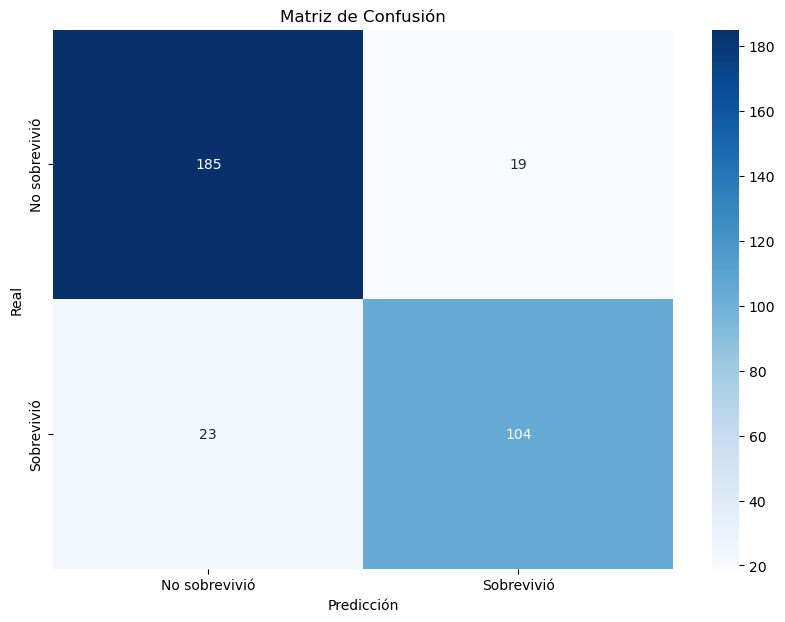

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [20]:
conf_matrix

array([[185,  19],
       [ 23, 104]])

In [21]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.8731117824773413


In [22]:
# Reporte de clasificación para obtener F1 score, recall y precision (sensibilidad)
class_report = classification_report(y_test, y_pred, output_dict=True)
print(f"Reporte de clasificación:\n{classification_report(y_test, y_pred)}")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       204
           1       0.85      0.82      0.83       127

    accuracy                           0.87       331
   macro avg       0.87      0.86      0.87       331
weighted avg       0.87      0.87      0.87       331



In [24]:
# save the model with pickle
import pickle
with open('best_model.pkl', 'wb') as file:
	pickle.dump(best_model, file)
# save the scaler with pickle
with open('scaler.pkl', 'wb') as file:
	pickle.dump(scaler, file)


In [27]:
# load model and predict the "datasets/df_test_models.xlsx"
with open('best_model.pkl', 'rb') as file:
	best_model = pickle.load(file)
# load scaler
with open('scaler.pkl', 'rb') as file:
	scaler = pickle.load(file)
# predict the "datasets/df_test_models.xlsx"
df_test_models = pd.read_excel("datasets/df_test_models.xlsx")
X_test = df_test_models.drop(columns='Survived')
X_test_scaled_columns = scaler.transform(X_test[columns_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = X_test_scaled_columns
y_pred = best_model.predict(X_test_scaled)
# save the predictions in a csv file
df_test_models['Predicted'] = y_pred
df_test_models.to_csv('predictions.csv', index=False)



In [26]:
# provide the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8731117824773413
